# Result of HEMF

### model size

In [ ]:
from main_model import HEMF
import torch
from thop import profile
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
model = HEMF(num_classes=7).to(device)
i = torch.randn(1, 3, 224, 224).to(device)
o = model(i)

flops, params = profile(model, inputs=(i,),verbose=False)
print('FLOPs = ' + str(flops/1000**3) + 'G')
print('Params = ' + str(params/1000**2) + 'M')

FLOPs = 10.008994068G
Params = 66.635063M


### ISIC2018 dataset

using cuda:0 device.
Namespace(batch_size=32, test_data_path='../test_set', model_path='model_weight/HEMF-ISIC2018.pth')
['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']
3001 images for test.
Using 8 dataloader workers every process
[testing...]: 100%|██████████| 94/94 [00:31<00:00,  2.95it/s]
              precision    recall  f1-score   support

       AKIEC     0.7300    0.7449    0.7374        98
         BCC     0.7389    0.7532    0.7460       154
         BKL     0.7785    0.7690    0.7737       329
          DF     0.7857    0.6471    0.7097        34
         MEL     0.7170    0.6697    0.6925       333
          NV     0.9294    0.9428    0.9361      2011
        VASC     0.9500    0.9048    0.9268        42

    accuracy                         0.8734      3001
   macro avg     0.8042    0.7759    0.7889      3001
weighted avg     0.8717    0.8734    0.8723      3001



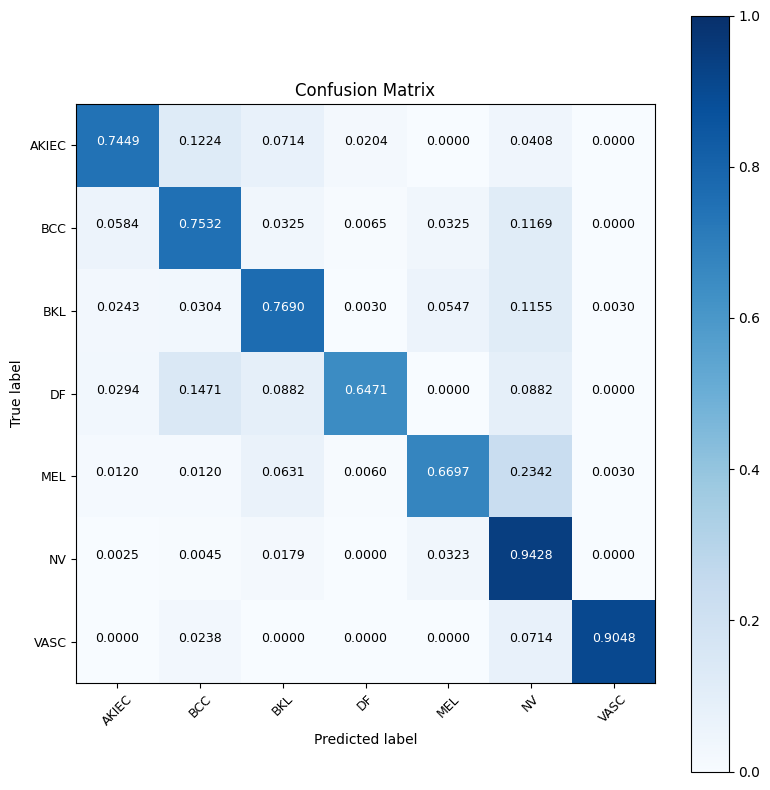

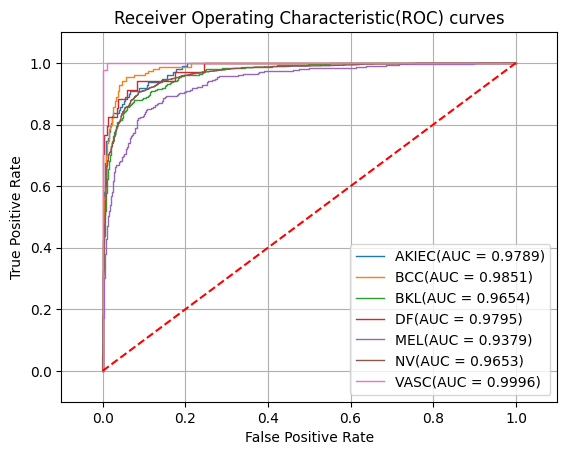

In [1]:
%run test.py --batch_size 32 --test_data_path "../test_set" --model_path "model_weight/HEMF-ISIC2018.pth"

### Kvasir dataset

using cuda:0 device.
Namespace(batch_size=32, test_data_path='../test_set_2', model_path='model_weight/HEMF-Kvasir-fold1.pth')
['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']
2000 images for test.
Using 8 dataloader workers every process
[testing...]: 100%|██████████| 63/63 [00:22<00:00,  2.79it/s]
                        precision    recall  f1-score   support

    dyed-lifted-polyps     0.8487    0.8080    0.8279       250
dyed-resection-margins     0.8244    0.8640    0.8438       250
           esophagitis     0.8853    0.7720    0.8248       250
          normal-cecum     0.8855    0.9280    0.9062       250
        normal-pylorus     0.9606    0.9760    0.9683       250
         normal-z-line     0.8007    0.9160    0.8545       250
                polyps     0.8008    0.8040    0.8024       250
    ulcerative-colitis     0.9301    0.8520    0.8894       250

              accuracy 

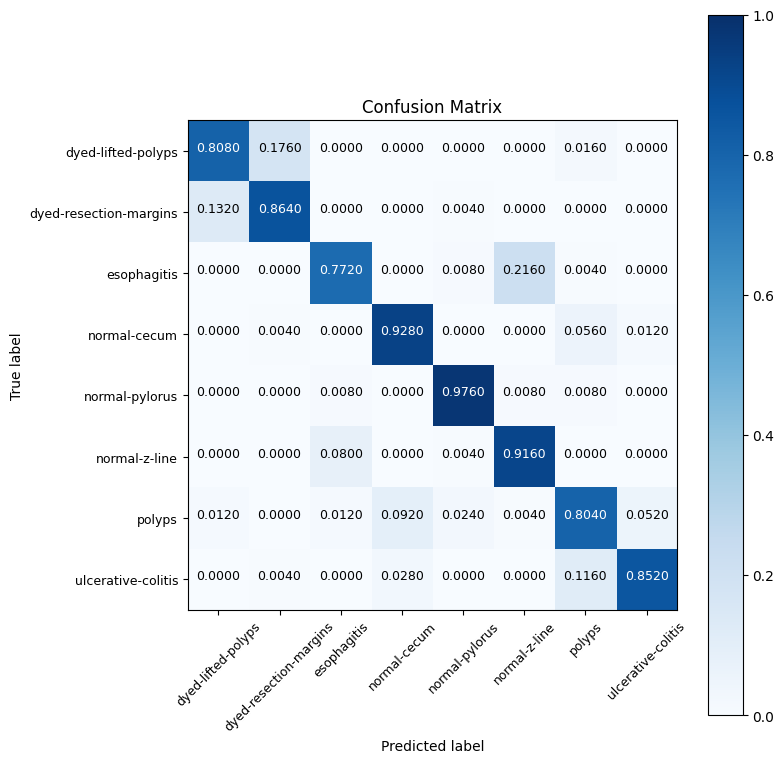

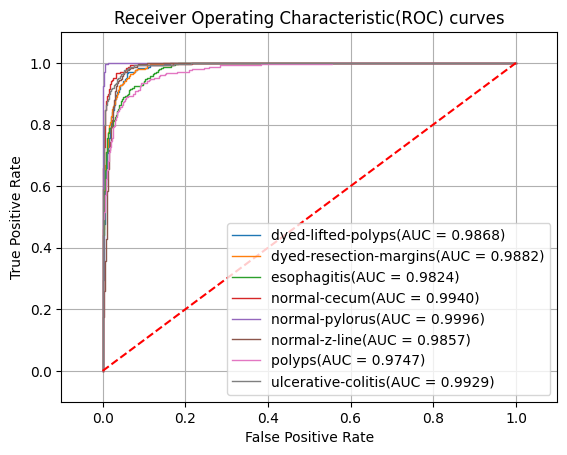

In [1]:
# fold 1
%run test.py --batch_size 32 --test_data_path "../test_set_2" --model_path "model_weight/HEMF-Kvasir-fold1.pth"

using cuda:0 device.
Namespace(batch_size=32, test_data_path='../training_set_2', model_path='model_weight/HEMF-Kvasir-fold2.pth')
['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']
2000 images for test.
Using 8 dataloader workers every process
[testing...]: 100%|██████████| 63/63 [00:22<00:00,  2.79it/s]
                        precision    recall  f1-score   support

    dyed-lifted-polyps     0.8059    0.8800    0.8413       250
dyed-resection-margins     0.8739    0.8040    0.8375       250
           esophagitis     0.9032    0.7840    0.8394       250
          normal-cecum     0.8881    0.9520    0.9189       250
        normal-pylorus     0.9833    0.9400    0.9611       250
         normal-z-line     0.8042    0.9200    0.8582       250
                polyps     0.8244    0.8640    0.8438       250
    ulcerative-colitis     0.9556    0.8600    0.9053       250

              accur

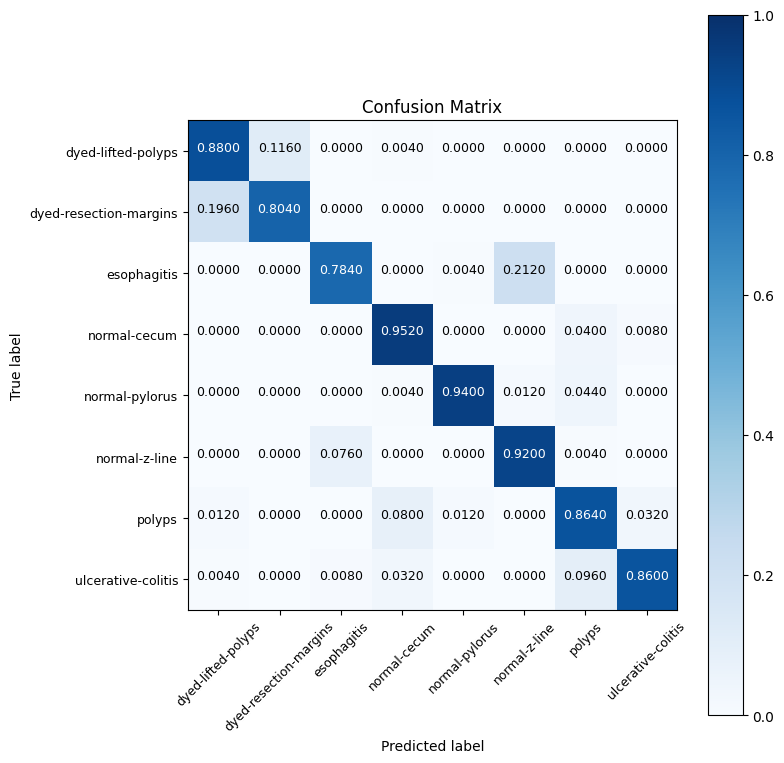

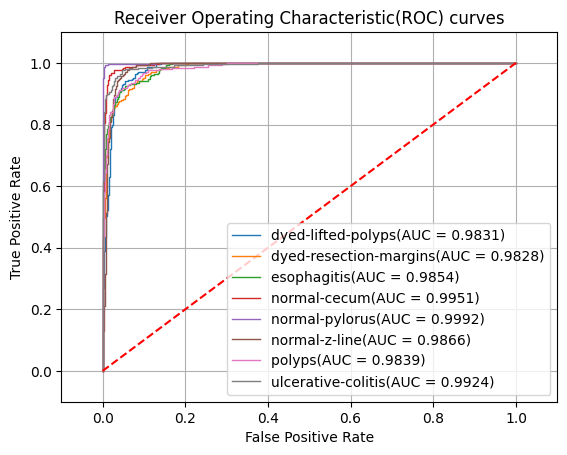

In [1]:
# fold 2
%run test.py --batch_size 32 --test_data_path "../training_set_2" --model_path "model_weight/HEMF-Kvasir-fold2.pth"

In [3]:
            # precision    recall  f1-score
# fold1
# accuracy                          0.8650
# macro avg     0.8670    0.8650    0.8646

# fold2
# accuracy                          0.8755
# macro avg     0.8798    0.8755    0.8757

print('2-fold cross-validation result:')
print('accuracy: ', ((0.8650 + 0.8755) / 2))
print('precision: ', ((0.8670 + 0.8798) / 2))
print('recall: ', ((0.8650 + 0.8755) / 2))
print('f1-score: ', ((0.8646 + 0.8757) / 2))

2-fold cross-validation result:
accuracy:  0.87025
precision:  0.8734
recall:  0.87025
f1-score:  0.87015


### COVID19-CT dataset

using cuda:0 device.
Namespace(batch_size=32, test_data_path='../test_set_3', model_path='model_weight/HEMF-COVID19-CT.pth')
['CT_COVID', 'CT_NonCOVID']
186 images for test.
Using 8 dataloader workers every process
[testing...]: 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]
              precision    recall  f1-score   support

    CT_COVID     0.8068    0.8161    0.8114        87
 CT_NonCOVID     0.8367    0.8283    0.8325        99

    accuracy                         0.8226       186
   macro avg     0.8218    0.8222    0.8220       186
weighted avg     0.8227    0.8226    0.8226       186



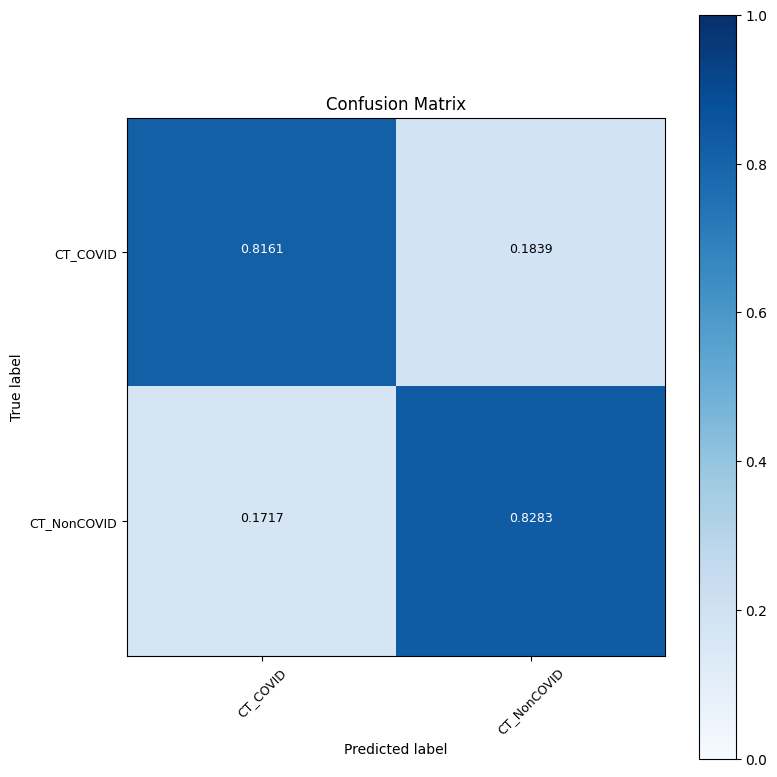

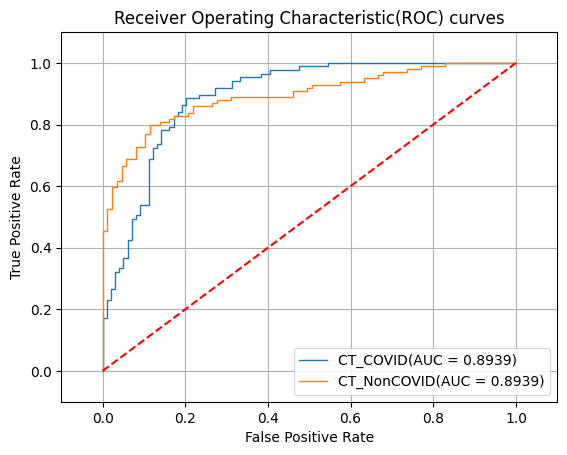

In [1]:
%run test.py --batch_size 32 --test_data_path "../test_set_3" --model_path "model_weight/HEMF-COVID19-CT.pth"

# Parameters and FLOPs comparison of SIRMLP and IRMLP

In [2]:
from HEF_block import SIRMLP,IRMLP
import torch
from thop import profile

device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
channels = [96, 192, 384, 768]
h_w = [56, 28, 14, 7]
in_features = []
for i in range(4):
    in_features.append(torch.randn(1, channels[i] * 3, h_w[i], h_w[i]).to(device)) # B, C, H, W

for i in range(4):
    print('Layer' + str(i+1))
    
    model = SIRMLP(channels[i] * 3, channels[i], channels[i]).to(device)
    o = model(in_features[i])
    flops, params = profile(model, inputs=(in_features[i],),verbose=False)
    SIRMLPflops, SIRMLPparams = flops/1000**3, params/1000**2
    print('SIRMLP: FLOPs = {:0.3f}G, Params = {:0.3f}M'.format(SIRMLPflops, SIRMLPparams))

    model = IRMLP(channels[i] * 3, channels[i]).to(device)
    o = model(in_features[i])
    flops, params = profile(model, inputs=(in_features[i],),verbose=False)
    IRMLPflops, IRMLPparams = flops/1000**3, params/1000**2
    print('IRMLP: FLOPs = {:0.3f}G, Params = {:0.3f}M'.format(IRMLPflops, IRMLPparams))

    print('IRMLP -> SIRMLP Decline: FLOPs {:0.3f}%, Params {:0.3f}%'.format((IRMLPflops-SIRMLPflops)/IRMLPflops*100,
                                                  (IRMLPparams-SIRMLPparams)/IRMLPparams*100))

Layer1
SIRMLP: FLOPs = 0.582G, Params = 0.185M
IRMLP: FLOPs = 3.733G, Params = 1.190M
IRMLP -> SIRMLP Decline: FLOPs 84.419%, Params 84.450%
Layer2
SIRMLP: FLOPs = 0.580G, Params = 0.739M
IRMLP: FLOPs = 3.731G, Params = 4.757M
IRMLP -> SIRMLP Decline: FLOPs 84.458%, Params 84.473%
Layer3
SIRMLP: FLOPs = 0.579G, Params = 2.952M
IRMLP: FLOPs = 3.729G, Params = 19.025M
IRMLP -> SIRMLP Decline: FLOPs 84.477%, Params 84.484%
Layer4
SIRMLP: FLOPs = 0.578G, Params = 11.802M
IRMLP: FLOPs = 3.729G, Params = 76.093M
IRMLP -> SIRMLP Decline: FLOPs 84.487%, Params 84.490%


# Ablation study of HEMF on ISIC2018 dataset

## components: ELF block, EGF block, Channel&Spatial Attn, MultiHeadExternal Attn, SIRMLP

### Setting1: ELF block

using cuda:0 device.
Namespace(batch_size=32, test_data_path='../test_set', model_path='model_weight/HEMF-ISIC2018-S1.pth')
['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']
3001 images for test.
Using 8 dataloader workers every process
[testing...]: 100%|██████████| 94/94 [00:13<00:00,  6.81it/s]
              precision    recall  f1-score   support

       AKIEC     0.6341    0.5306    0.5778        98
         BCC     0.6410    0.6494    0.6452       154
         BKL     0.7179    0.5957    0.6512       329
          DF     0.3478    0.4706    0.4000        34
         MEL     0.5833    0.4835    0.5287       333
          NV     0.8825    0.9334    0.9072      2011
        VASC     0.8293    0.8095    0.8193        42

    accuracy                         0.8117      3001
   macro avg     0.6623    0.6390    0.6470      3001
weighted avg     0.8039    0.8117    0.8060      3001



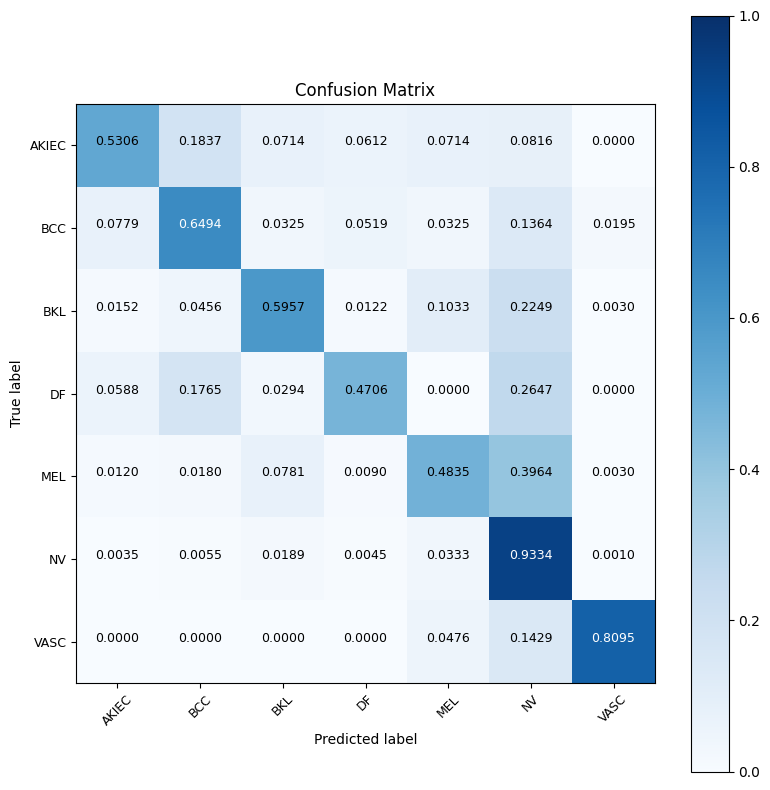

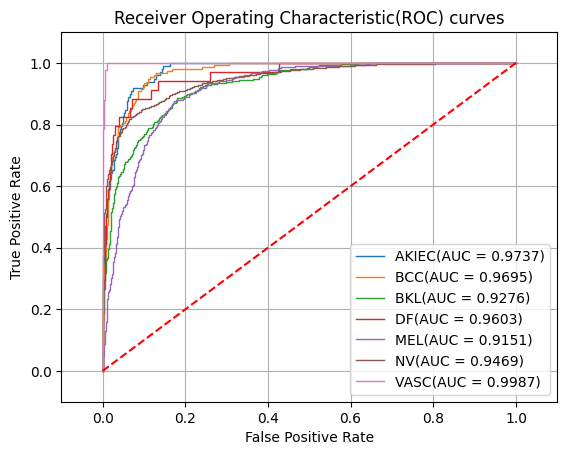

In [1]:
%run test.py --batch_size 32 --test_data_path "../test_set" --model_path "model_weight/HEMF-ISIC2018-S1.pth"

### Setting2: EGF block

using cuda:0 device.
Namespace(batch_size=32, test_data_path='../test_set', model_path='model_weight/HEMF-ISIC2018-S2.pth')
['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']
3001 images for test.
Using 8 dataloader workers every process
[testing...]: 100%|██████████| 94/94 [00:20<00:00,  4.66it/s]
              precision    recall  f1-score   support

       AKIEC     0.6806    0.5000    0.5765        98
         BCC     0.5989    0.7273    0.6569       154
         BKL     0.6462    0.6383    0.6422       329
          DF     0.4255    0.5882    0.4938        34
         MEL     0.6121    0.5165    0.5603       333
          NV     0.9115    0.9214    0.9164      2011
        VASC     0.7143    0.9524    0.8163        42

    accuracy                         0.8184      3001
   macro avg     0.6556    0.6920    0.6661      3001
weighted avg     0.8173    0.8184    0.8162      3001



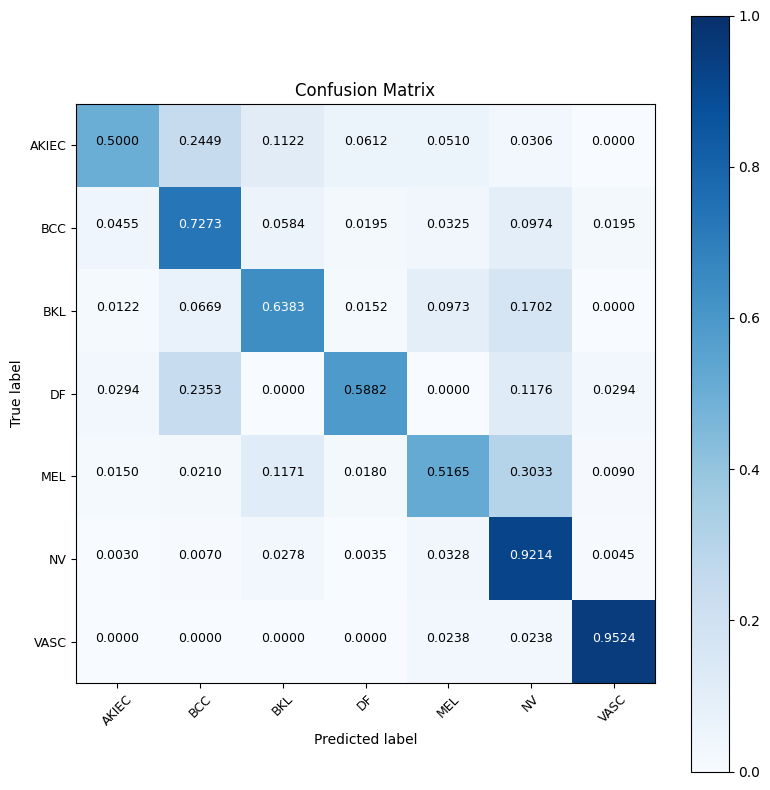

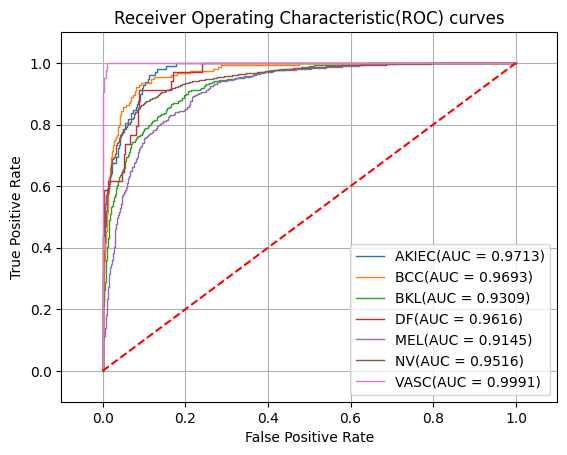

In [1]:
%run test.py --batch_size 32 --test_data_path "../test_set" --model_path "model_weight/HEMF-ISIC2018-S2.pth"

### Setting3: ELF block + EGF block

using cuda:0 device.
Namespace(batch_size=32, test_data_path='../test_set', model_path='model_weight/HEMF-ISIC2018-S3.pth')
['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']
3001 images for test.
Using 8 dataloader workers every process
[testing...]: 100%|██████████| 94/94 [00:24<00:00,  3.76it/s]
              precision    recall  f1-score   support

       AKIEC     0.5957    0.5714    0.5833        98
         BCC     0.7481    0.6558    0.6990       154
         BKL     0.5788    0.7143    0.6395       329
          DF     0.7500    0.4412    0.5556        34
         MEL     0.6167    0.5556    0.5845       333
          NV     0.9152    0.9120    0.9136      2011
        VASC     0.9286    0.9286    0.9286        42

    accuracy                         0.8214      3001
   macro avg     0.7333    0.6827    0.7006      3001
weighted avg     0.8245    0.8214    0.8214      3001



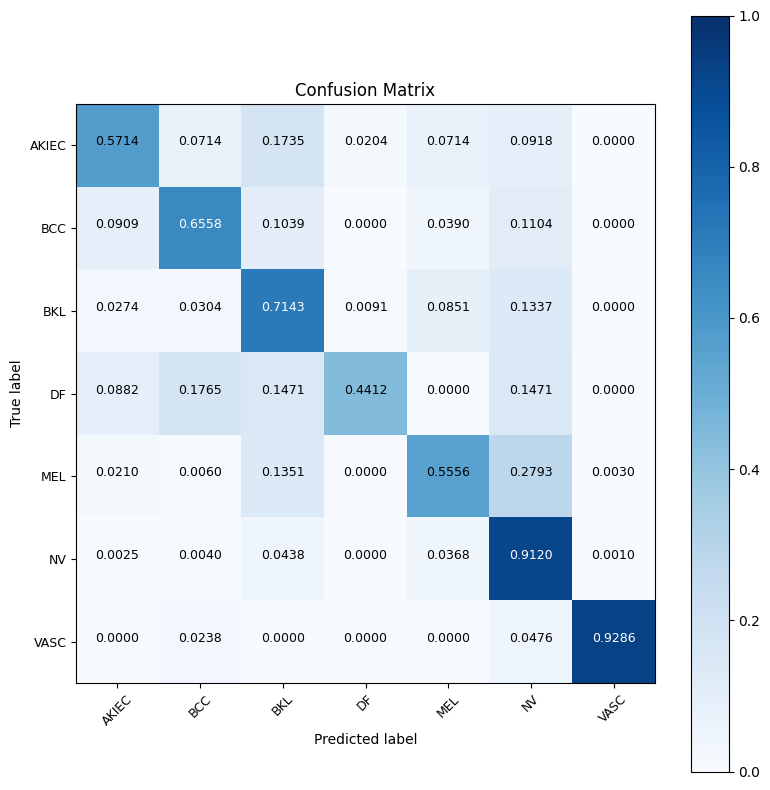

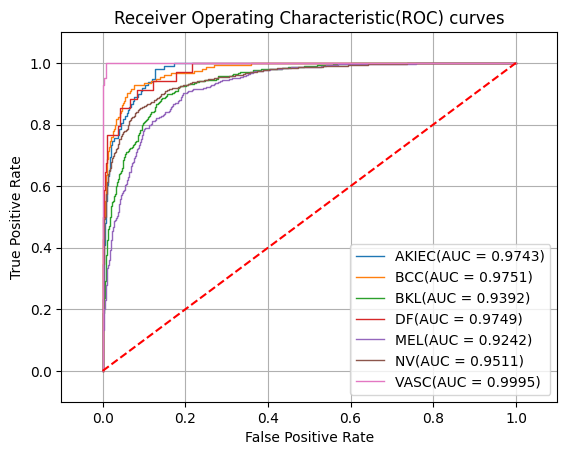

In [1]:
%run test.py --batch_size 32 --test_data_path "../test_set" --model_path "model_weight/HEMF-ISIC2018-S3.pth"

### Setting4: ELF block + EGF block + MultiHeadExternal Attn

using cuda:0 device.
Namespace(batch_size=32, test_data_path='../test_set', model_path='model_weight/HEMF-ISIC2018-S4.pth')
['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']
3001 images for test.
Using 8 dataloader workers every process
[testing...]: 100%|██████████| 94/94 [00:29<00:00,  3.24it/s]
              precision    recall  f1-score   support

       AKIEC     0.6186    0.6122    0.6154        98
         BCC     0.6257    0.7273    0.6727       154
         BKL     0.7095    0.6383    0.6720       329
          DF     0.6667    0.4706    0.5517        34
         MEL     0.6727    0.5616    0.6121       333
          NV     0.9108    0.9443    0.9272      2011
        VASC     0.9048    0.9048    0.9048        42

    accuracy                         0.8404      3001
   macro avg     0.7298    0.6941    0.7080      3001
weighted avg     0.8353    0.8404    0.8365      3001



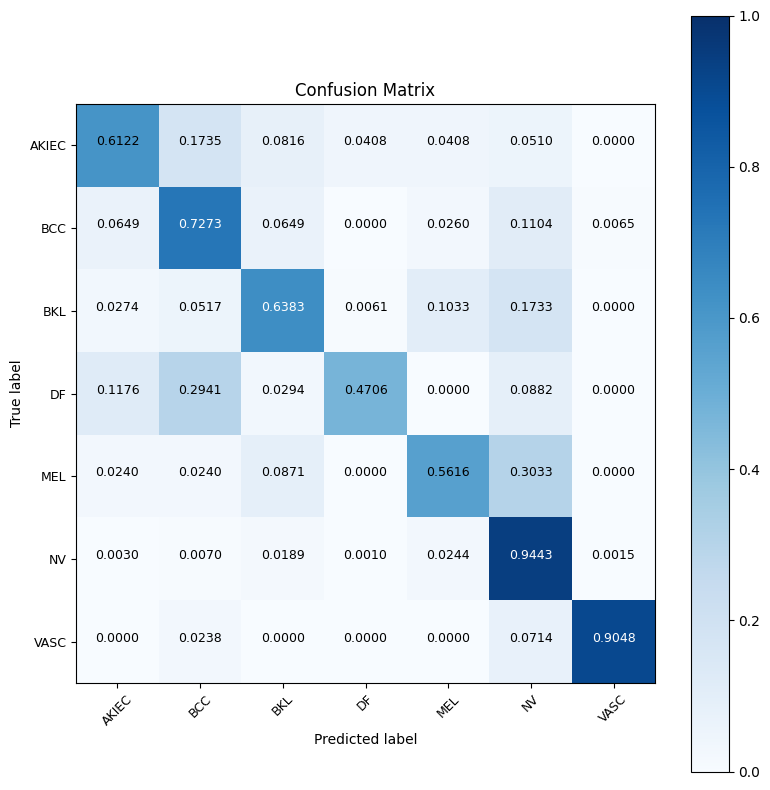

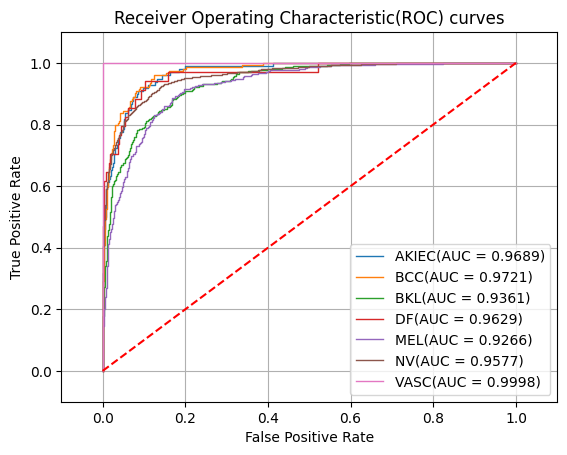

In [1]:
%run test.py --batch_size 32 --test_data_path "../test_set" --model_path "model_weight/HEMF-ISIC2018-S4.pth"

### Setting5: ELF block + EGF block + Channel&Spatial Attn

using cuda:0 device.
Namespace(batch_size=32, test_data_path='../test_set', model_path='model_weight/HEMF-ISIC2018-S5.pth')
['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']
3001 images for test.
Using 8 dataloader workers every process
[testing...]: 100%|██████████| 94/94 [00:26<00:00,  3.60it/s]
              precision    recall  f1-score   support

       AKIEC     0.6117    0.6429    0.6269        98
         BCC     0.6842    0.6753    0.6797       154
         BKL     0.6953    0.5897    0.6382       329
          DF     0.4872    0.5588    0.5205        34
         MEL     0.6599    0.5826    0.6188       333
          NV     0.9035    0.9403    0.9215      2011
        VASC     0.9268    0.9048    0.9157        42

    accuracy                         0.8341      3001
   macro avg     0.7098    0.6992    0.7030      3001
weighted avg     0.8285    0.8341    0.8302      3001



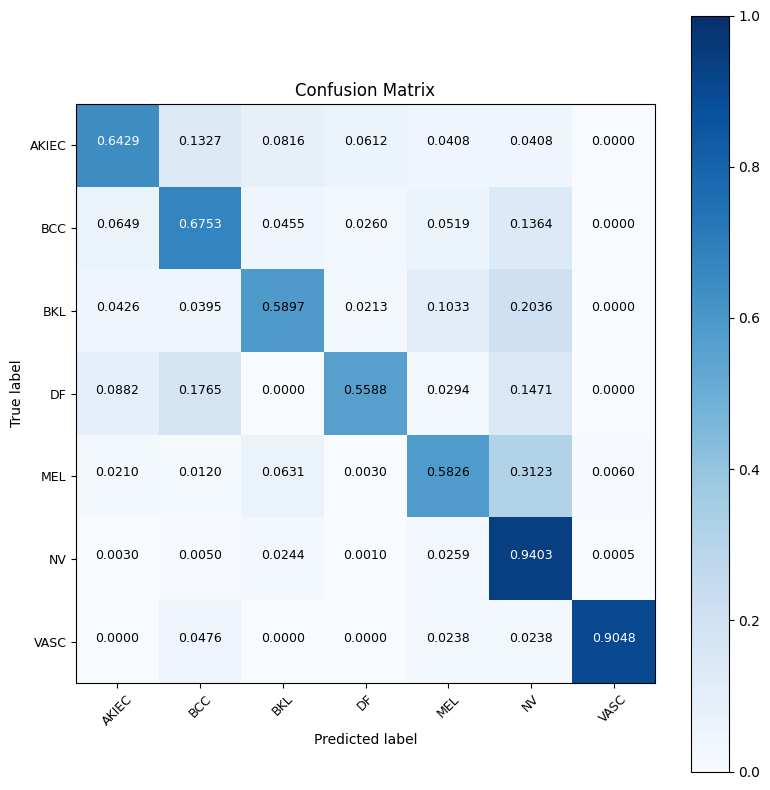

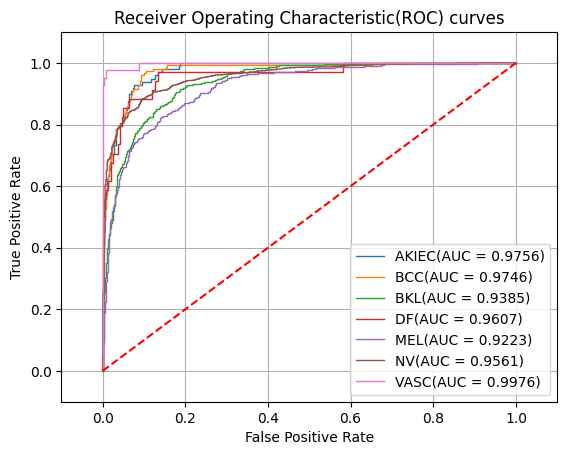

In [1]:
%run test.py --batch_size 32 --test_data_path "../test_set" --model_path "model_weight/HEMF-ISIC2018-S5.pth"

### Setting6: ELF block + EGF block + MultiHeadExternal Attn + Channel&Spatial Attn

using cuda:0 device.
Namespace(batch_size=32, test_data_path='../test_set', model_path='model_weight/HEMF-ISIC2018-S6.pth')
['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']
3001 images for test.
Using 8 dataloader workers every process
[testing...]: 100%|██████████| 94/94 [00:30<00:00,  3.07it/s]
              precision    recall  f1-score   support

       AKIEC     0.6701    0.6633    0.6667        98
         BCC     0.7134    0.7597    0.7358       154
         BKL     0.6981    0.6748    0.6862       329
          DF     0.5294    0.5294    0.5294        34
         MEL     0.6465    0.6096    0.6275       333
          NV     0.9218    0.9314    0.9265      2011
        VASC     0.9286    0.9286    0.9286        42

    accuracy                         0.8454      3001
   macro avg     0.7297    0.7281    0.7287      3001
weighted avg     0.8434    0.8454    0.8443      3001



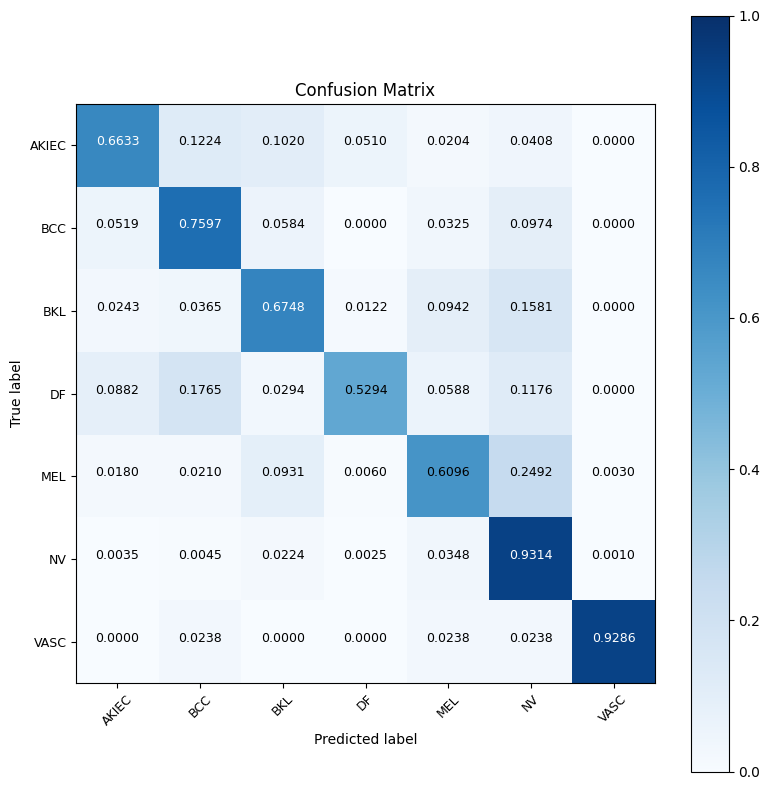

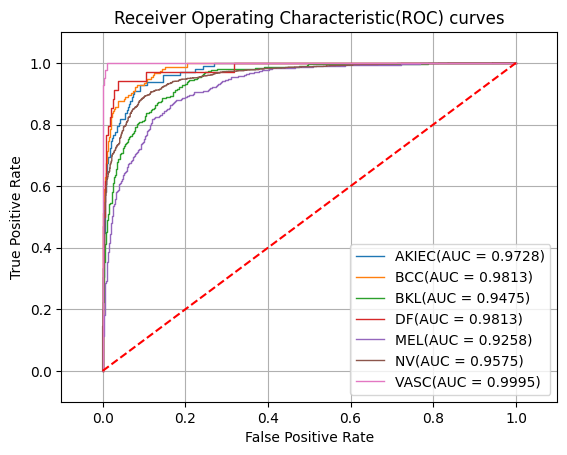

In [1]:
%run test.py --batch_size 32 --test_data_path "../test_set" --model_path "model_weight/HEMF-ISIC2018-S6.pth"

### Setting7: ELF block + EGF block + MultiHeadExternal Attn + Channel&Spatial Attn + SIRMLP (HEMF)

using cuda:0 device.
Namespace(batch_size=32, test_data_path='../test_set', model_path='model_weight/HEMF-ISIC2018.pth')
['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']
3001 images for test.
Using 8 dataloader workers every process
[testing...]: 100%|██████████| 94/94 [00:31<00:00,  2.95it/s]
              precision    recall  f1-score   support

       AKIEC     0.7300    0.7449    0.7374        98
         BCC     0.7389    0.7532    0.7460       154
         BKL     0.7785    0.7690    0.7737       329
          DF     0.7857    0.6471    0.7097        34
         MEL     0.7170    0.6697    0.6925       333
          NV     0.9294    0.9428    0.9361      2011
        VASC     0.9500    0.9048    0.9268        42

    accuracy                         0.8734      3001
   macro avg     0.8042    0.7759    0.7889      3001
weighted avg     0.8717    0.8734    0.8723      3001



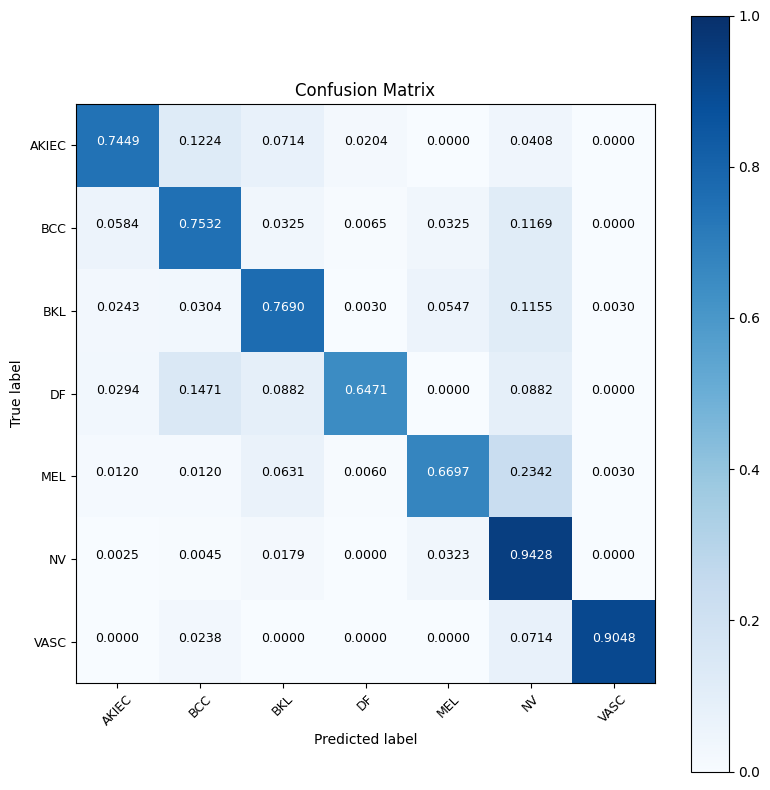

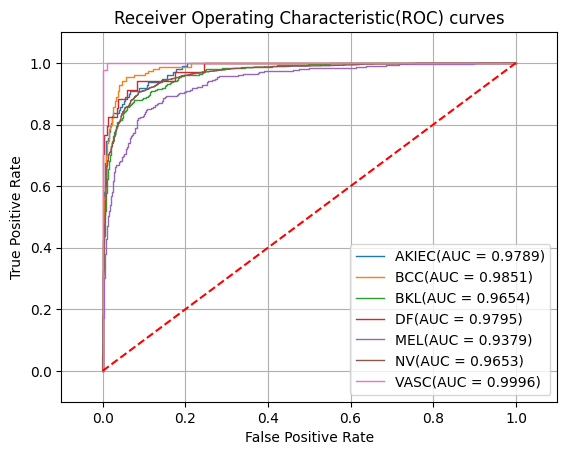

In [1]:
%run test.py --batch_size 32 --test_data_path "../test_set" --model_path "model_weight/HEMF-ISIC2018.pth"